In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')


In [2]:
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, delimiter=';')


In [3]:
# Display the first few rows
print(df.head())

# Get the basic information
print(df.info())

# Summary statistics
print(df.describe())


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
# Check for missing values
print(df.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


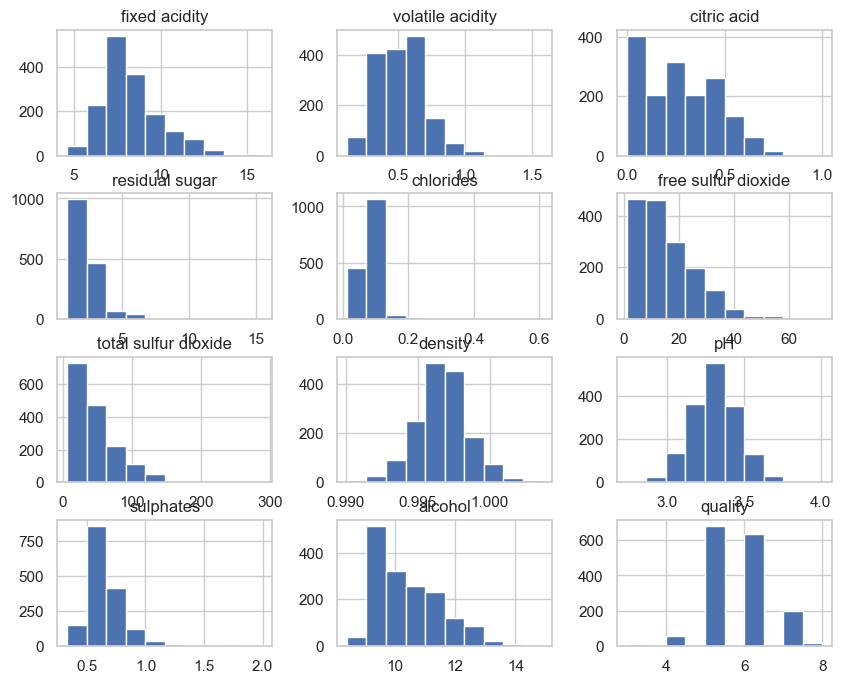

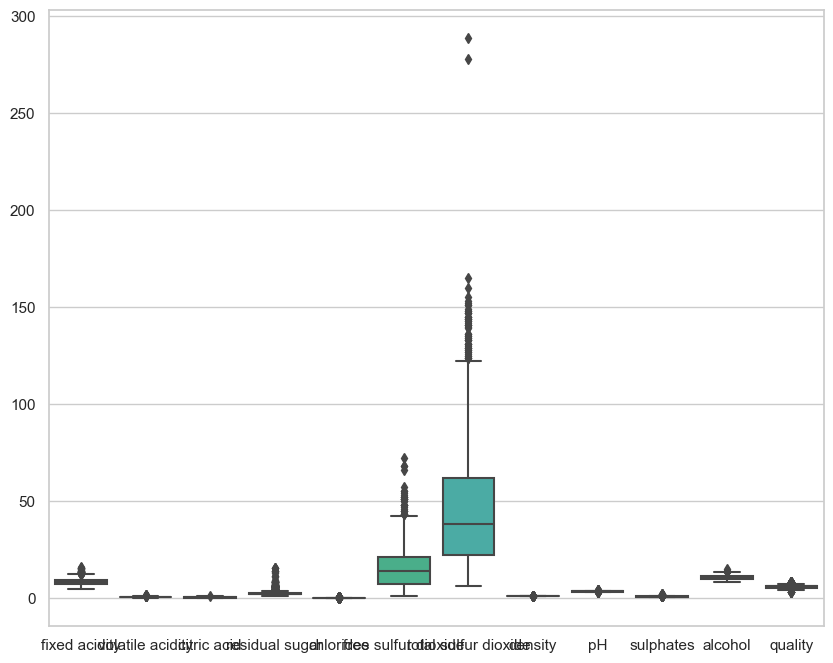

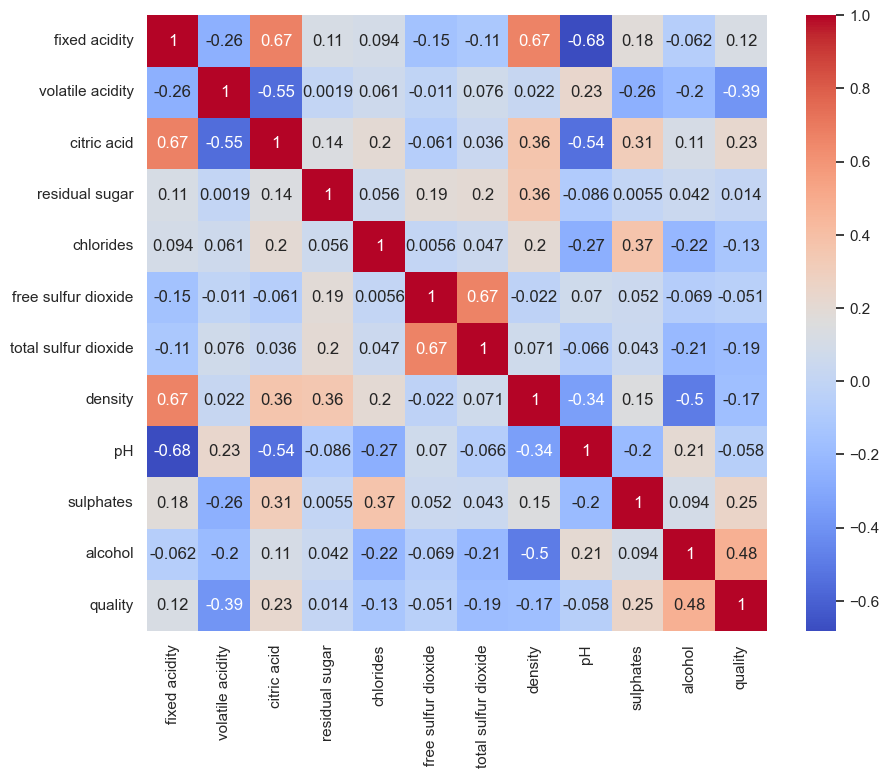

C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


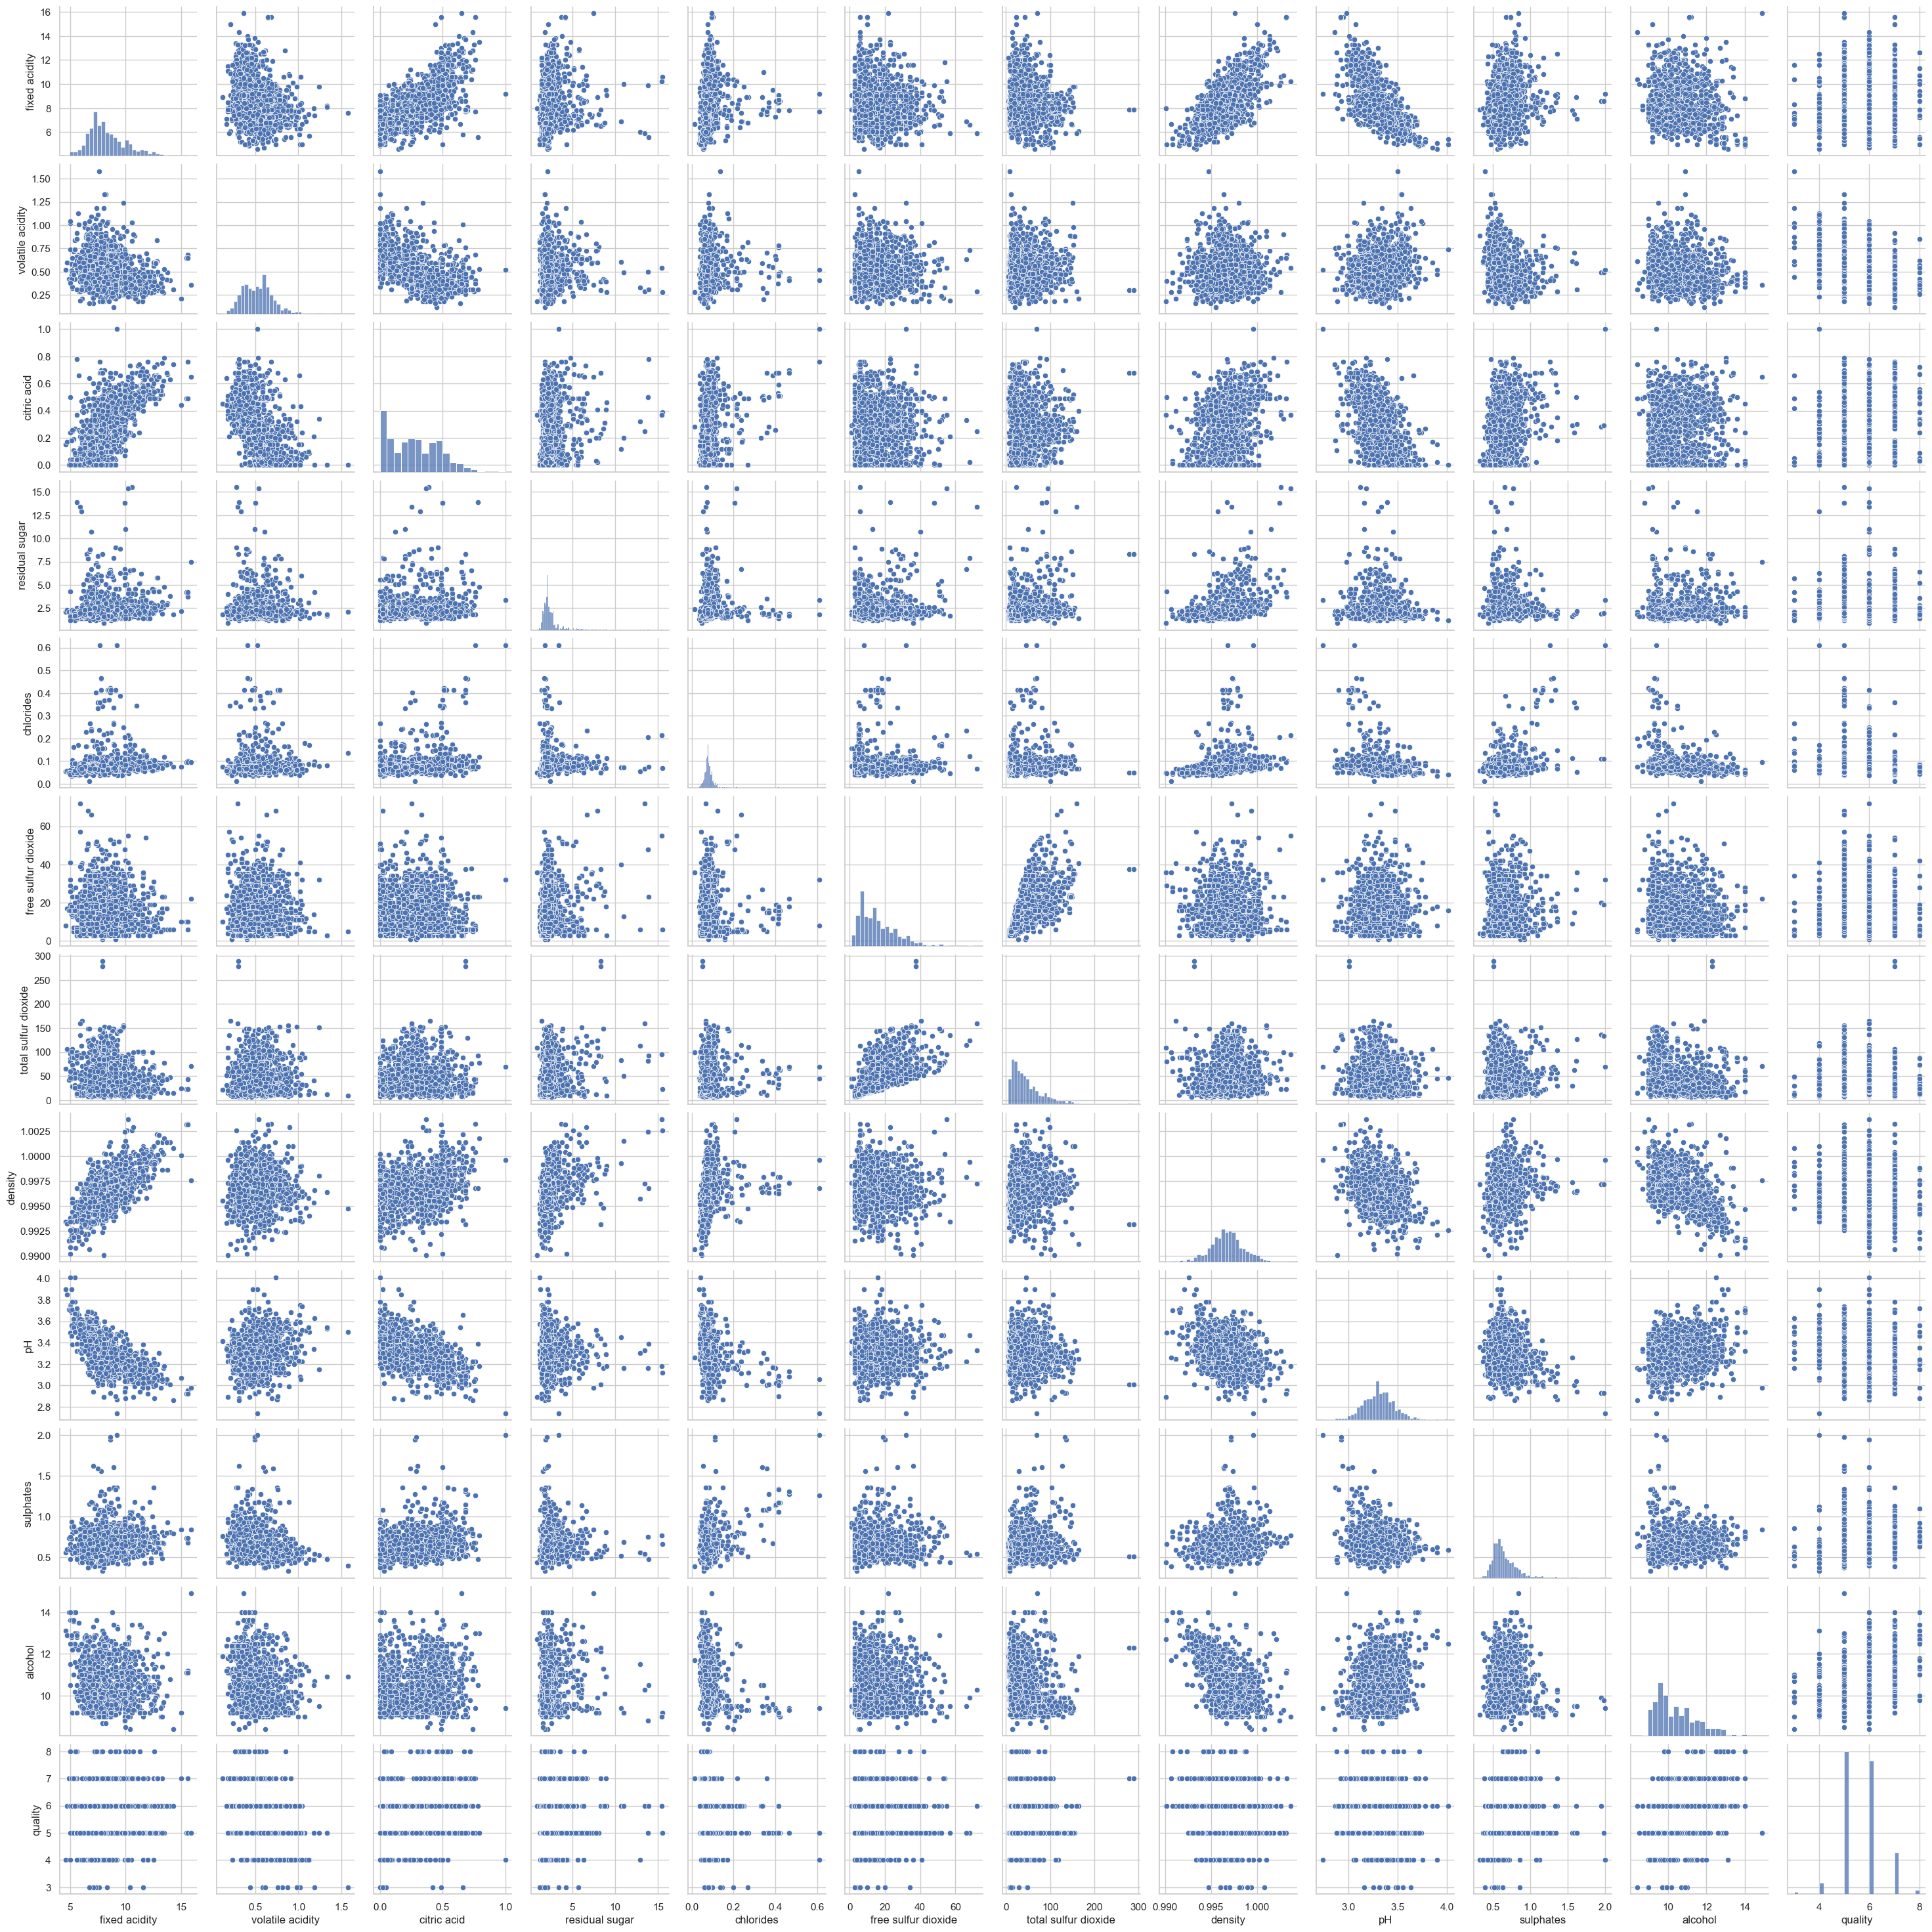

In [5]:
# Histograms for numerical columns
df.hist(figsize=(10, 8))
plt.show()

# Box plots to identify outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for relationships between variables
sns.pairplot(df)
plt.show()


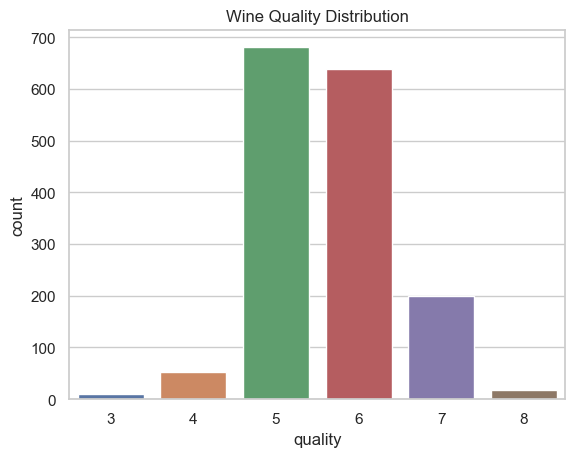

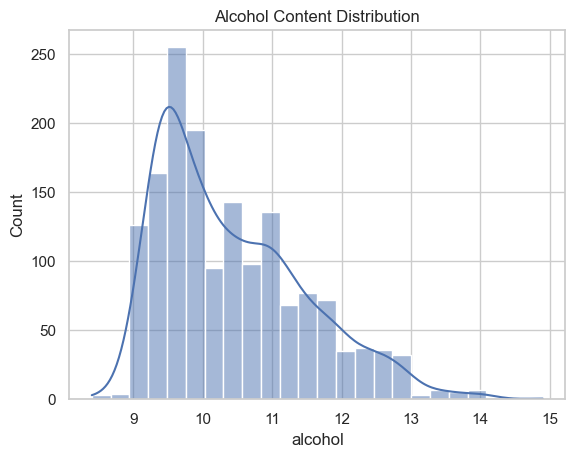

In [6]:
# Distribution of quality ratings
sns.countplot(x='quality', data=df)
plt.title('Wine Quality Distribution')
plt.show()

# Distribution of alcohol content
sns.histplot(df['alcohol'], kde=True)
plt.title('Alcohol Content Distribution')
plt.show()


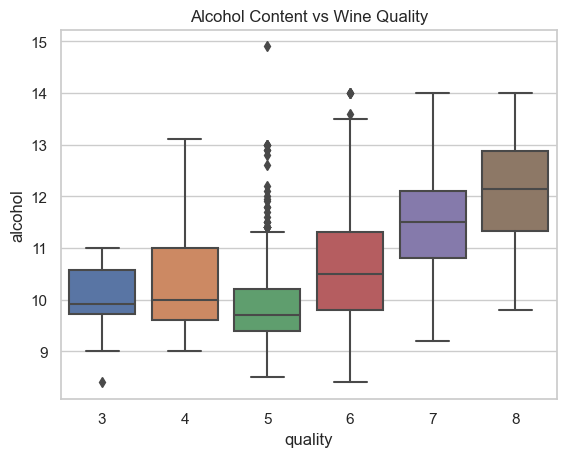

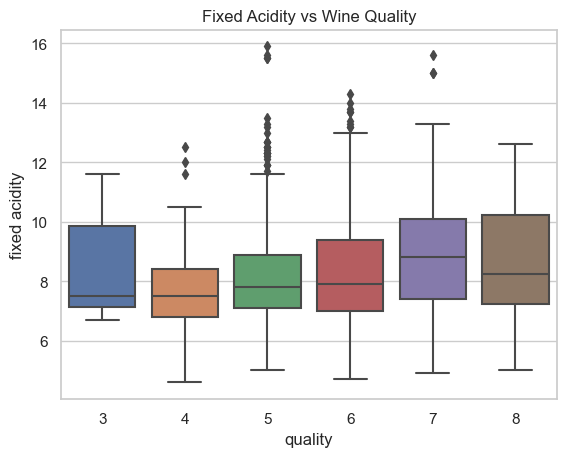

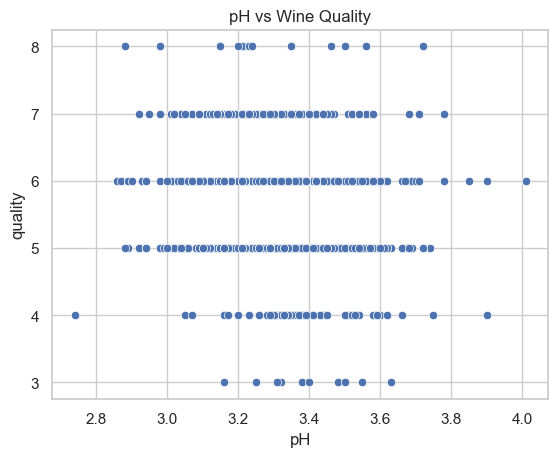

In [7]:
# Alcohol content vs Quality
sns.boxplot(x='quality', y='alcohol', data=df)
plt.title('Alcohol Content vs Wine Quality')
plt.show()

# Fixed acidity vs Quality
sns.boxplot(x='quality', y='fixed acidity', data=df)
plt.title('Fixed Acidity vs Wine Quality')
plt.show()

# Scatter plot of pH vs Quality
sns.scatterplot(x='pH', y='quality', data=df)
plt.title('pH vs Wine Quality')
plt.show()


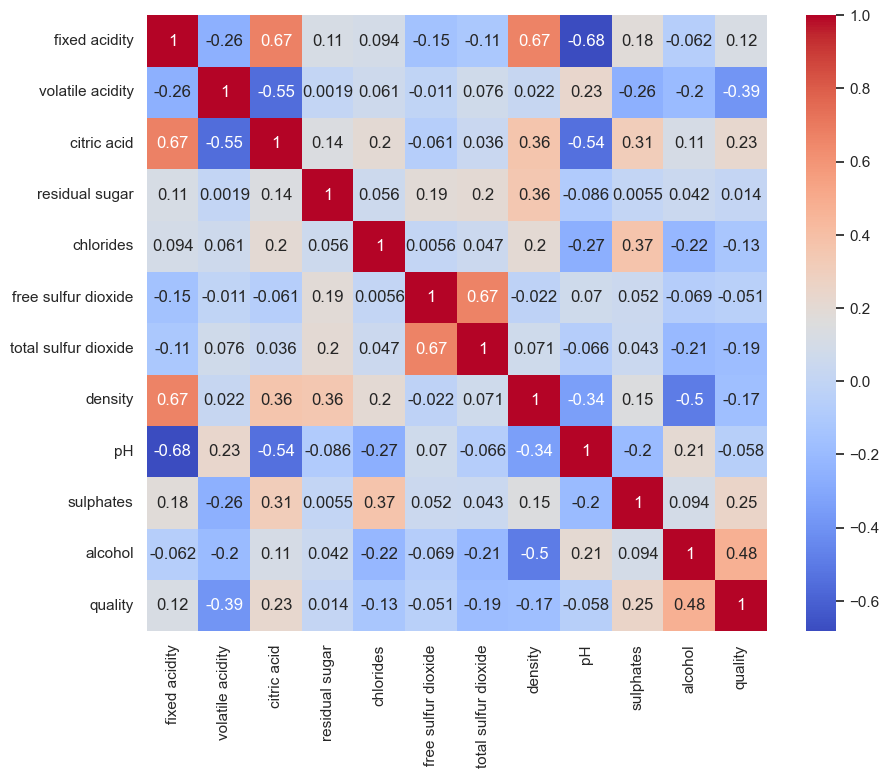

C:\Users\rachi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


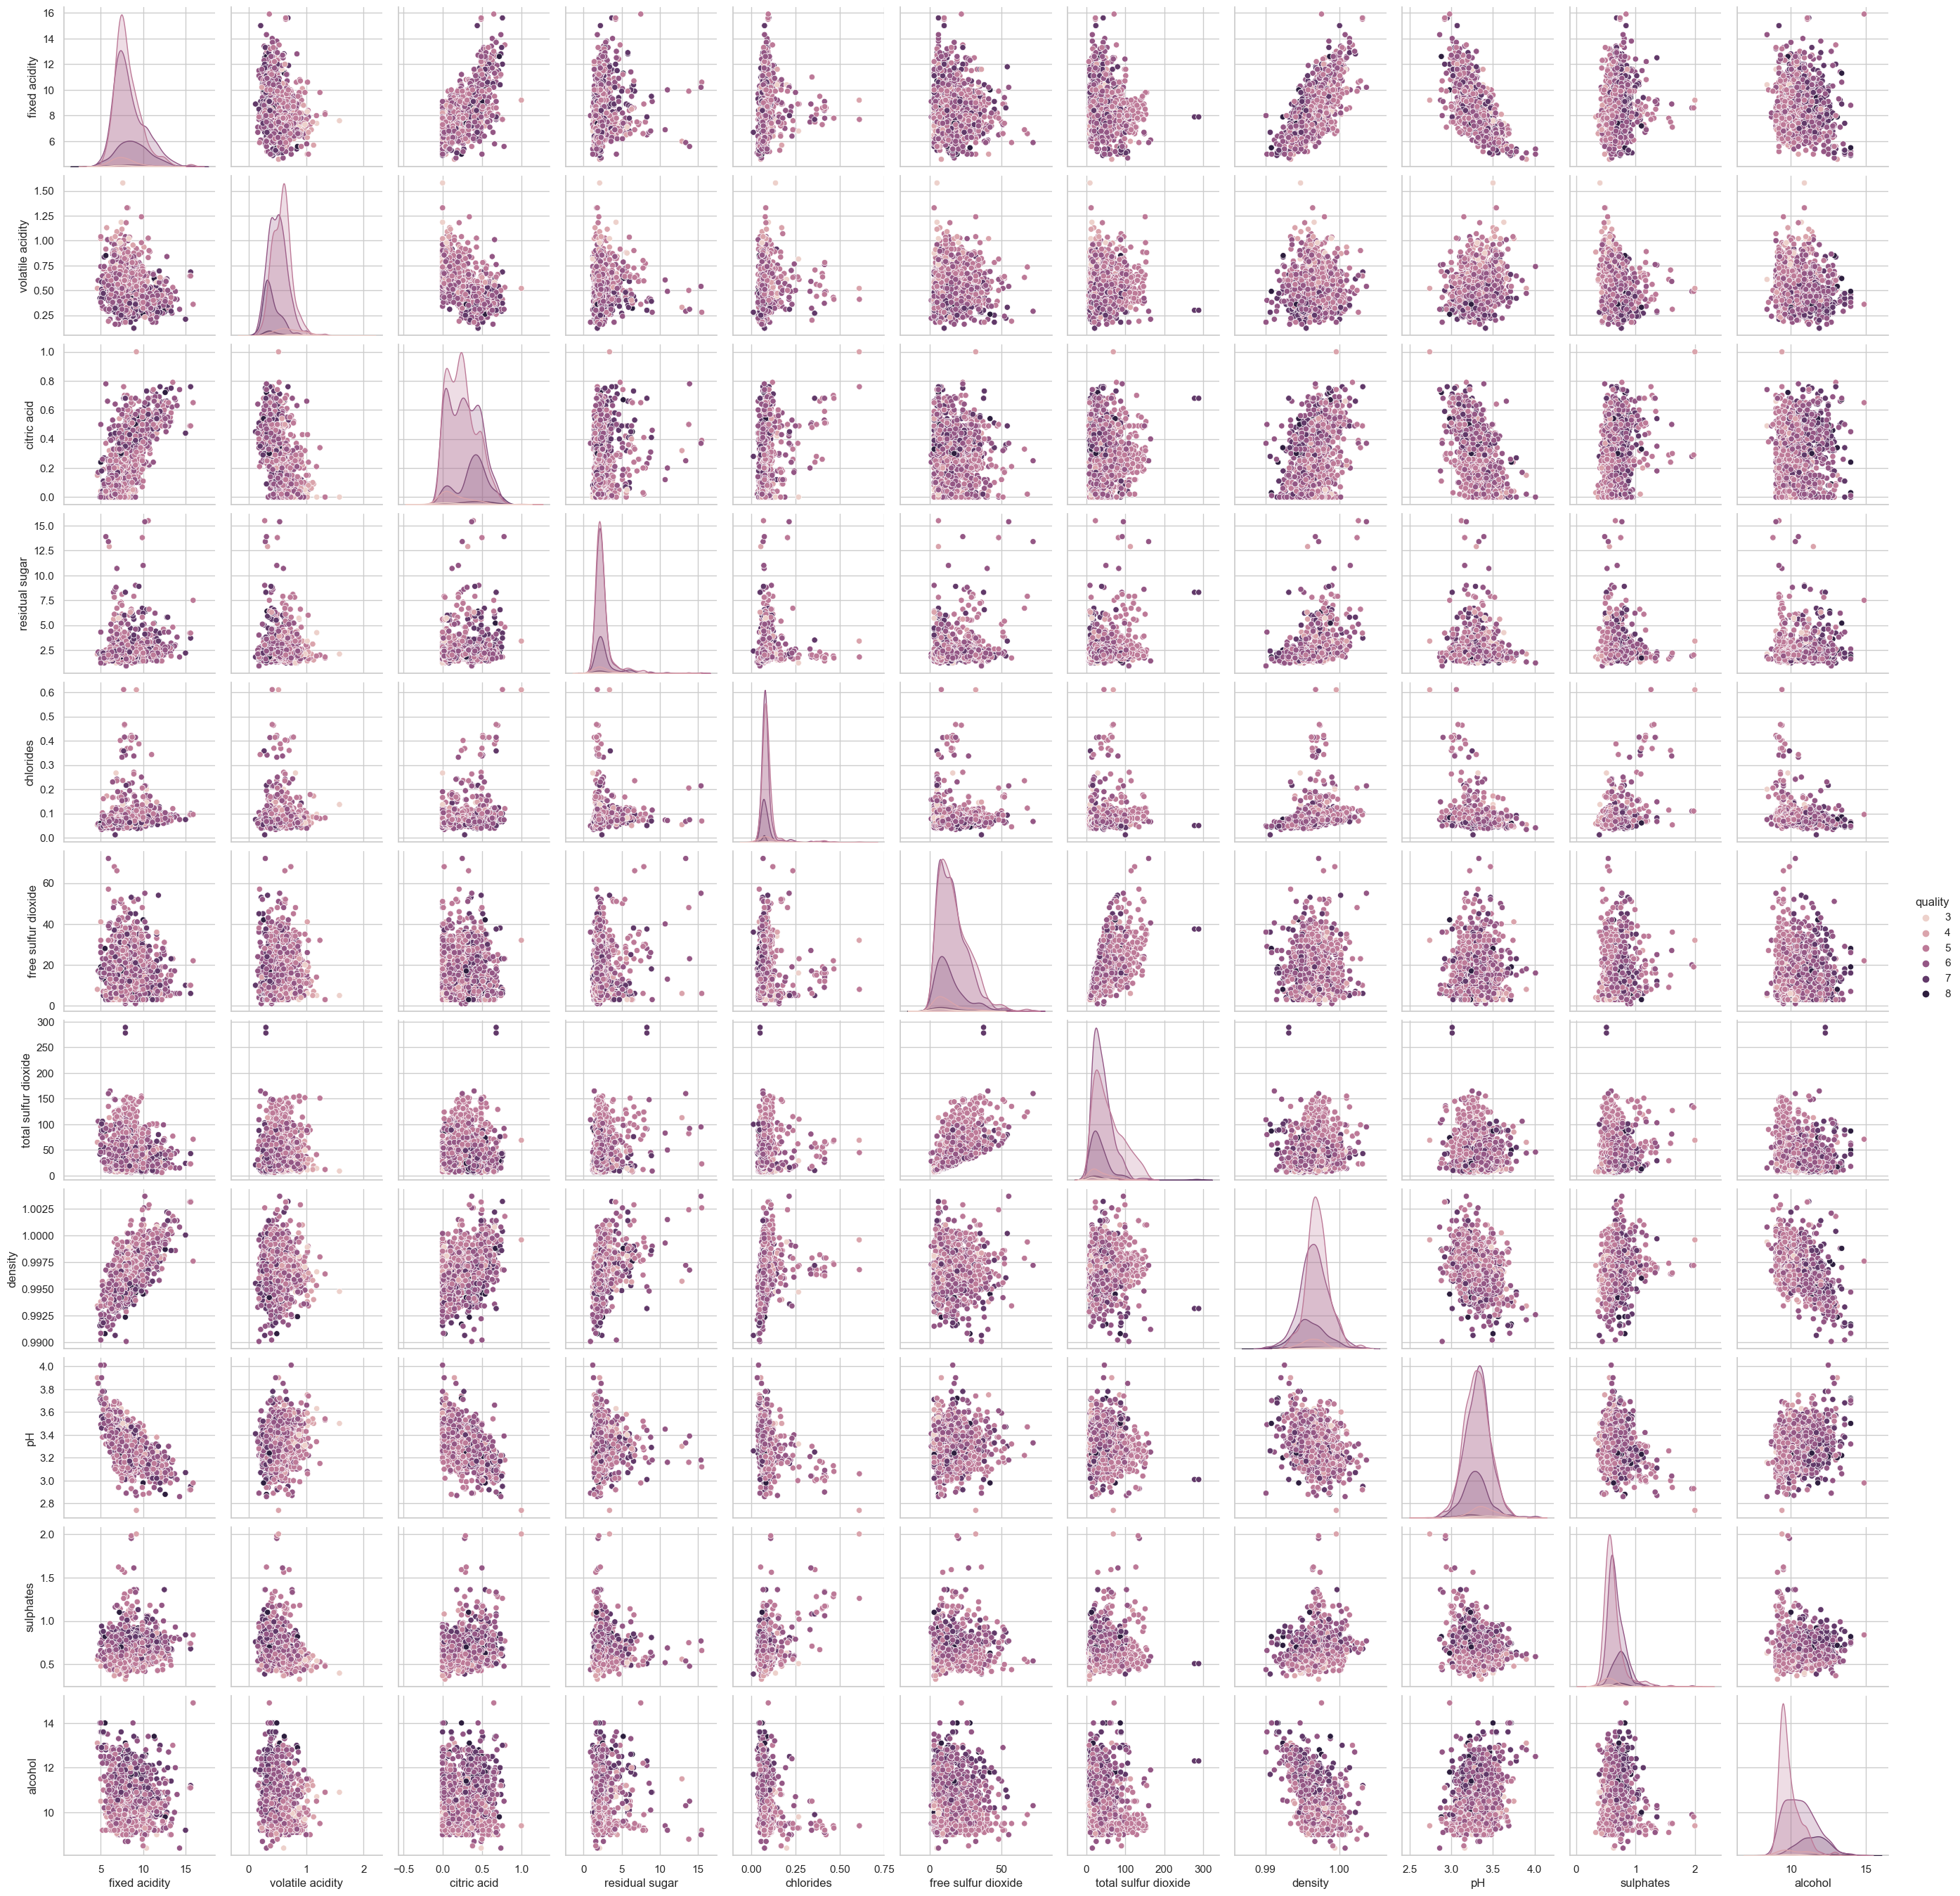

In [8]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

# Pair plot for multiple variables
sns.pairplot(df, hue='quality')
plt.show()


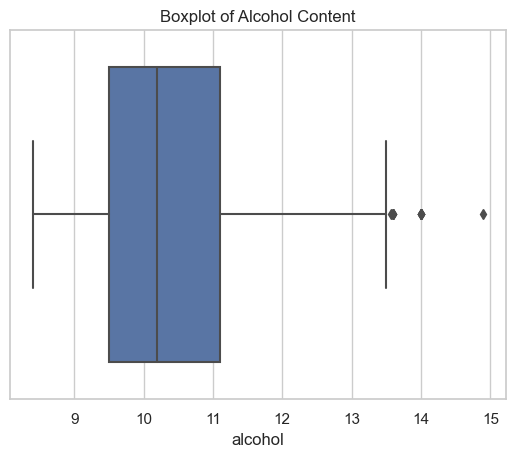

In [9]:
# Box plot to identify outliers in alcohol
sns.boxplot(x=df['alcohol'])
plt.title('Boxplot of Alcohol Content')
plt.show()

# Removing outliers from alcohol content
Q1 = df['alcohol'].quantile(0.25)
Q3 = df['alcohol'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['alcohol'] < (Q1 - 1.5 * IQR)) | (df['alcohol'] > (Q3 + 1.5 * IQR)))]


In [10]:
# Create new feature: total_acidity
df['total_acidity'] = df['fixed acidity'] + df['volatile acidity']


In [11]:
# Summarize key findings
print("Key Insights:")

# Quality vs Alcohol
quality_alcohol = df.groupby('quality')['alcohol'].mean()
print(f"Average Alcohol Content by Quality:\n{quality_alcohol}")

# Quality vs Fixed Acidity
quality_fixed_acidity = df.groupby('quality')['fixed acidity'].mean()
print(f"Average Fixed Acidity by Quality:\n{quality_fixed_acidity}")

# Quality vs pH
quality_pH = df.groupby('quality')['pH'].mean()
print(f"Average pH by Quality:\n{quality_pH}")

# Quality vs Total Acidity
quality_total_acidity = df.groupby('quality')['total_acidity'].mean()
print(f"Average Total Acidity by Quality:\n{quality_total_acidity}")


Key Insights:
Average Alcohol Content by Quality:
quality
3     9.955000
4    10.265094
5     9.892353
6    10.603528
7    11.409021
8    11.856250
Name: alcohol, dtype: float64
Average Fixed Acidity by Quality:
quality
3    8.360000
4    7.779245
5    8.155882
6    8.366983
7    8.956701
8    8.981250
Name: fixed acidity, dtype: float64
Average pH by Quality:
quality
3    3.398000
4    3.381509
5    3.305426
6    3.316051
7    3.283557
8    3.224375
Name: pH, dtype: float64
Average Total Acidity by Quality:
quality
3    9.244500
4    8.473208
5    8.733243
6    8.865363
7    9.360000
8    9.400625
Name: total_acidity, dtype: float64


Findings:
1. Quality Distribution: Most wines are rated between 5 and 7, with very few wines rated below 3 or above 8.
2. Alcohol Content: Wines with higher quality ratings tend to have higher average alcohol content.
3. Fixed Acidity: There is no clear trend between fixed acidity and wine quality, though certain acidity levels might correspond to specific quality ratings.
4. pH: pH levels vary across different quality ratings, but there is no strong correlation.
5. Total Acidity: Total acidity does not show a strong correlation with wine quality.